Exercicio com dados diabete com normalizacao e teste com regularizacao

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('../../../Datasets/pima-indians-diabetes.csv')

In [4]:
display(data)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing



In [6]:
scaler = preprocessing.MinMaxScaler()

y = data['Class']
X = data.drop(['Class'], axis = 1)

X = scaler.fit_transform(X)
# le = preprocessing.LabelEncoder()
# X['famhist'] = le.fit_transform(X['famhist'])

display(X)

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

In [25]:
X_train, X_teste, y_train, y_test = train_test_split(X,y, test_size = 0.3)

In [53]:
classif = SGDClassifier()
classif.fit(X_train, y_train)

print(X_train, y_train)

[[0.05882353 0.6080402  0.63934426 ... 0.58122206 0.07813834 0.11666667]
 [0.17647059 0.44723618 0.60655738 ... 0.45305514 0.20196413 0.28333333]
 [0.64705882 0.71859296 0.7704918  ... 0.54545455 0.07514944 0.5       ]
 ...
 [0.41176471 0.53266332 0.49180328 ... 0.39493294 0.09308284 0.13333333]
 [0.05882353 0.43718593 0.63934426 ... 0.51564829 0.00982067 0.01666667]
 [0.47058824 0.63316583 0.72131148 ... 0.57377049 0.11571307 0.46666667]] 751    0
431    0
24     1
58     0
250    0
      ..
75     0
229    0
276    1
225    0
345    0
Name: Class, Length: 537, dtype: int64


In [54]:
from sklearn.metrics import classification_report

y_pred = classif.predict(X_teste)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       151
           1       0.71      0.57      0.63        80

    accuracy                           0.77       231
   macro avg       0.75      0.72      0.73       231
weighted avg       0.76      0.77      0.76       231



In [55]:
0.77from sklearn.metrics import confusion_matrix

In [56]:
print(confusion_matrix(y_test, y_pred))

[[132  19]
 [ 34  46]]


In [57]:
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso 
from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt

(300, 1, 8)


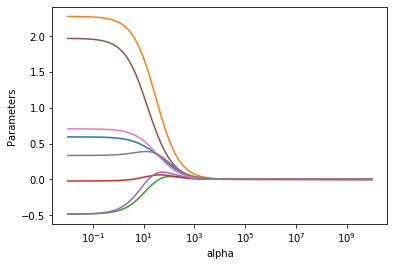

In [62]:
ridge = RidgeClassifier()
MSEs = []
coefs = []


alphas = 10**np.linspace(10,-2,300)*0.5

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X_train, y_train) 
    MSEs.append(mean_squared_error(y_test,ridge.predict(X_teste)))
    coefs.append(ridge.coef_)
    #print(ridge.coef_.shape)
    
print(np.array(coefs).shape)
    
coefs = np.array(coefs).reshape(300,8)

ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Parameters')

plt.show()

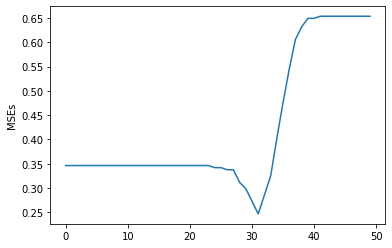

In [64]:
plt.plot(MSEs[100:150])
plt.ylabel('MSEs')

plt.show()

In [65]:
ridge.set_params(alpha = alphas[131])
ridge.fit(X_train, y_train) 
MSE = mean_squared_error(y_test,ridge.predict(X_teste))

print(MSE/10**16)

2.4675324675324676e-17


In [66]:
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#Y_pred = ridge.predict(X_test)
Y_pred_ = ridge.predict(X_teste)

print(Y_pred_)
# REG LINEAR

# plt.scatter(X_test, y_test)
# plt.plot(X_test, Y_pred, color = 'red')
# plt.show()

# REGRESSOR GRAD DESC

# NORMALIZACAO INVERSE PRA PLOTAR!!

X_teste  = pd.DataFrame(scaler.inverse_transform(X_teste))

print(X_teste.shape)
print(y_test.shape)

#display(X_)

# #figg = plt.subplot((2,2,2))
# plt.scatter(X_teste, y_test)
# plt.scatter(X_teste, Y_pred_, color = 'red')

print(confusion_matrix(y_test, Y_pred_))
print(classification_report(y_test, y_pred))

[0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0
 0 0 1 1 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 1 1 0
 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 1]
(231, 8)
(231,)
[[134  17]
 [ 40  40]]
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       151
           1       0.71      0.57      0.63        80

    accuracy                           0.77       231
   macro avg       0.75      0.72      0.73       231
weighted avg       0.76      0.77      0.76       231



## Regressao logistica e Naive Bayes

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import seaborn as sns

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, classification_report

from sklearn.linear_model import LogisticRegression

#Classificadores Lineares
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

#Classificadores KNN
from sklearn.neighbors import KNeighborsClassifier

#Classificadores Naive Nayes
from sklearn.naive_bayes import MultinomialNB

#Classificadores Arvores de Decisão
from sklearn.tree import DecisionTreeClassifier

#SVM
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, classification_report

from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import math

from sklearn import linear_model
from scipy.special import expit

### Naive Bayes

In [26]:
nb = GaussianNB()
nb.fit(X_train, y_train)
score=nb.score(X_teste, y_test)
ypred = nb.predict(X_teste)
cm = confusion_matrix(y, nb.predict(X))

# precision, recall, f1 metrics

print("precision:",precision_score(y_test, ypred))
print("recall:",recall_score(y_test, ypred))
print("f1:",f1_score(y_test, ypred))
print("nb Score: ",score)
print(cm)
print(classification_report(y_test,ypred))

precision: 0.6716417910447762
recall: 0.569620253164557
f1: 0.6164383561643836
nb Score:  0.7575757575757576
[[417  83]
 [107 161]]
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       152
           1       0.67      0.57      0.62        79

    accuracy                           0.76       231
   macro avg       0.73      0.71      0.72       231
weighted avg       0.75      0.76      0.75       231



### Reg Log

In [27]:
rl = LogisticRegression()
rl.fit(X_train, y_train)
score = rl.score(X_teste, y_test)
ypred = rl.predict(X_teste)
cm = confusion_matrix(y, rl.predict(X))

# precision, recall, f1 metrics

print("precision:",precision_score(y_test, ypred))
print("recall:",recall_score(y_test, ypred))
print("f1:",f1_score(y_test, ypred))
print("nb Score: ",score)
print(cm)

print(classification_report(y_test,ypred))

precision: 0.6981132075471698
recall: 0.46835443037974683
f1: 0.5606060606060606
nb Score:  0.7489177489177489
[[451  49]
 [138 130]]
              precision    recall  f1-score   support

           0       0.76      0.89      0.82       152
           1       0.70      0.47      0.56        79

    accuracy                           0.75       231
   macro avg       0.73      0.68      0.69       231
weighted avg       0.74      0.75      0.73       231



/home/leticia/miniconda3/envs/ambi/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Graficos (X com dois atributos apenas)

In [3]:
## USANDO DATASET ONDE X EH BIDIMENSIONAL PRA FAZER OS PLOTS COM MLXTEND

data = pd.read_csv('../../../Datasets/pima-indians-diabetes.csv')
corre = data.corr()
display(corre['Class'])

# As maiores correlacoes pra diabete foram glucose e bmi
# para heart disease foi tabaco e idade

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Class                       1.000000
Name: Class, dtype: float64

/home/leticia/miniconda3/envs/ambi/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


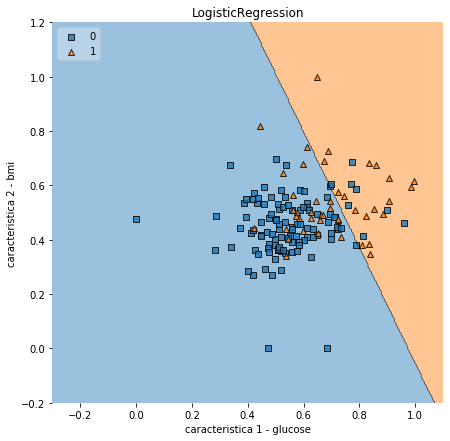

              precision    recall  f1-score   support

           0       0.80      0.93      0.86       110
           1       0.69      0.41      0.51        44

    accuracy                           0.78       154
   macro avg       0.74      0.67      0.69       154
weighted avg       0.77      0.78      0.76       154



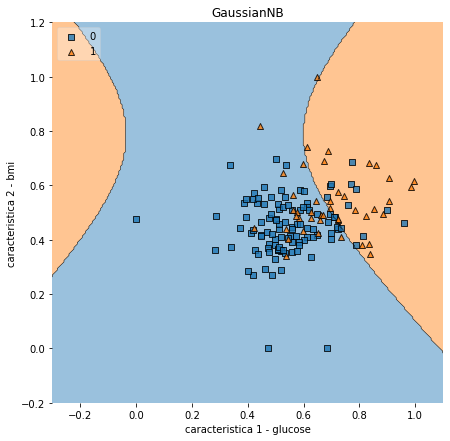

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       110
           1       0.65      0.50      0.56        44

    accuracy                           0.78       154
   macro avg       0.73      0.70      0.71       154
weighted avg       0.77      0.78      0.77       154



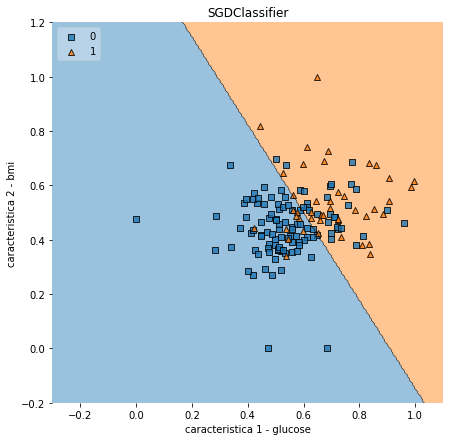

              precision    recall  f1-score   support

           0       0.90      0.74      0.81       110
           1       0.55      0.80      0.65        44

    accuracy                           0.75       154
   macro avg       0.72      0.77      0.73       154
weighted avg       0.80      0.75      0.76       154



In [6]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn import preprocessing
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, classification_report
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB


scaler = preprocessing.MinMaxScaler()

y = data['Class']
X = data[['Glucose','BMI']]

X = scaler.fit_transform(X)
X_train, X_teste, y_train, y_test = train_test_split(X,y, test_size = 0.2)

## MODELO

classifs = [LogisticRegression(),GaussianNB(),SGDClassifier()]
# classif = LogisticRegression()
# classif = GaussianNB()
# classif = SGDClassifier()
ypreds = {}
model = {}

for modelo in classifs:
    classif = modelo
    classif.fit(X_train, y_train)
    ypred = classif.predict(X_teste)
    ypreds[classif] = ypred
    x = plt.figure(figsize=(7,7))
    x = plot_decision_regions(X_teste, np.array(y_test), clf=classif, legend=2)
    plt.ylim(-0.2,1.2)
    plt.xlim(-0.3,1.1)
    plt.xlabel('caracteristica 1 - glucose')
    plt.ylabel('caracteristica 2 - bmi')
    plt.title(str(classif).split('(')[0])
    plt.show()
    print(classification_report(y_test,ypred))

/home/leticia/miniconda3/envs/ambi/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


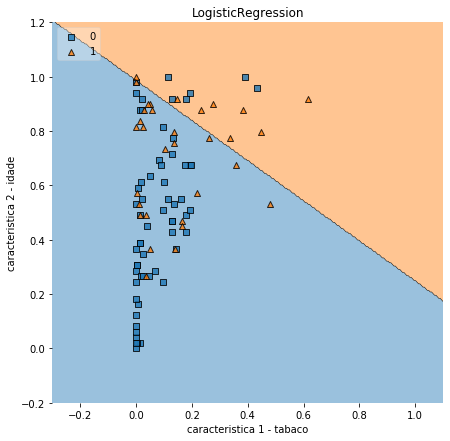

              precision    recall  f1-score   support

           0       0.70      0.90      0.79        61
           1       0.57      0.25      0.35        32

    accuracy                           0.68        93
   macro avg       0.63      0.58      0.57        93
weighted avg       0.65      0.68      0.64        93



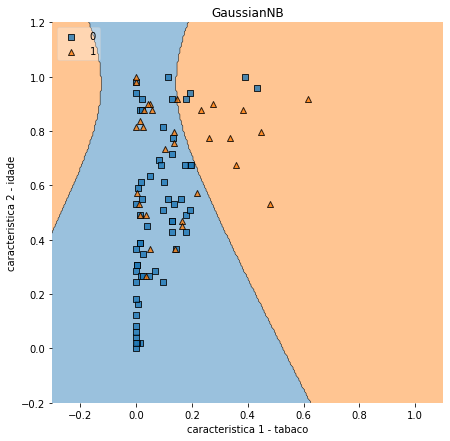

              precision    recall  f1-score   support

           0       0.72      0.93      0.81        61
           1       0.71      0.31      0.43        32

    accuracy                           0.72        93
   macro avg       0.72      0.62      0.62        93
weighted avg       0.72      0.72      0.68        93



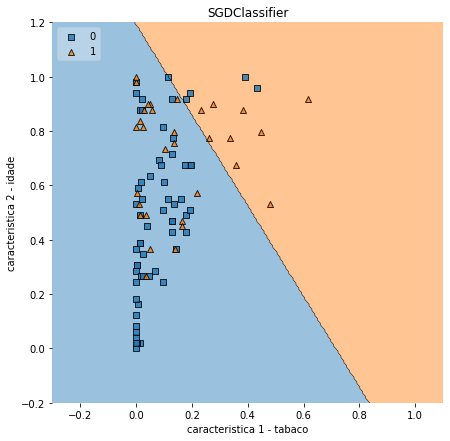

              precision    recall  f1-score   support

           0       0.71      0.93      0.81        61
           1       0.69      0.28      0.40        32

    accuracy                           0.71        93
   macro avg       0.70      0.61      0.60        93
weighted avg       0.71      0.71      0.67        93



In [7]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn import preprocessing
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, classification_report

scaler = preprocessing.MinMaxScaler()
data = pd.read_csv('../../../Datasets/SAheart.csv')


y = data['chd']
X = data[['tobacco','age']]

X = scaler.fit_transform(X)
X_train, X_teste, y_train, y_test = train_test_split(X,y, test_size = 0.2)

## MODELO

classifs = [LogisticRegression(),GaussianNB(),SGDClassifier()]
# classif = LogisticRegression()
# classif = GaussianNB()
# classif = SGDClassifier()
ypreds = {}
model = {}

for modelo in classifs:
    classif = modelo
    classif.fit(X_train, y_train)
    ypred = classif.predict(X_teste)
    ypreds[classif] = ypred
    x = plt.figure(figsize=(7,7))
    x = plot_decision_regions(X_teste, np.array(y_test), clf=classif, legend=2)
    plt.ylim(-0.2,1.2)
    plt.xlim(-0.3,1.1)
    plt.xlabel('caracteristica 1 - tabaco')
    plt.ylabel('caracteristica 2 - idade')
    plt.title(str(classif).split('(')[0])
    plt.show()
    print(classification_report(y_test,ypred))
#print(X_train, y_train)



# for ypred in ypreds.values():   
#     print(y_pred)

# Adding axes annotations